In [2]:
#import streamlit as st
import requests
import pandas as pd

In [3]:
def get_who_data(indicator_id):
    base_url = "https://ghoapi.azureedge.net/api/"
    url = f"{base_url}{indicator_id}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data['value']  # Les données sont dans la clé 'value'
    else:
        #st.error("Erreur lors de la récupération des données.")
        return None
    
def convert_to_dataframe(data):
    records = []
    for entry in data:
        record = {
                'Country': entry.get('SpatialDim', 'N/A'),
                'Continent': entry.get('ParentLocation', 'N/A'),
                'Year': entry.get('TimeDim', 'null'),
                'Value': entry.get('Value', 'N/A')
            }
        records.append(record)
    return pd.DataFrame(records)


In [7]:
def get_who_data2(indicator_id):
    base_url = "https://ghoapi.azureedge.net/api/"
    url = f"{base_url}{indicator_id}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json().get('value', [])
        
        # Filtrer les données pour ne garder que celles où NumericValue est non nul
        filtered_data = [entry for entry in data if entry.get('NumericValue') is not None]
        
        # Retourner les données uniquement si filtered_data n'est pas vide
        if filtered_data:
            return filtered_data
        else:
            print("Aucune donnée avec NumericValue non vide pour cet indicateur.")
            return None
    else:
        print("Erreur lors de la récupération des données.")
        return None

In [10]:
import requests

# Fonction pour récupérer la liste des indicateurs contenant "Health" dans le nom
def get_indicators():
    url = "https://ghoapi.azureedge.net/api/Indicator?$filter=contains(IndicatorName,'Health')"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json().get('value', [])
        indicators = {item['IndicatorName']: item['IndicatorCode'] for item in data}
        return indicators
    else:
        print("Erreur lors de la récupération des indicateurs.")
        return None

# Fonction pour récupérer les données d'un indicateur spécifique
def get_who_data(indicator_id):
    base_url = "https://ghoapi.azureedge.net/api/"
    url = f"{base_url}{indicator_id}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json().get('value', [])
        
        # Filtrer les données pour ne garder que celles où NumericValue est non nul
        filtered_data = [entry for entry in data if entry.get('NumericValue') is not None]
        
        # Retourner les données filtrées si elles existent
        return filtered_data if filtered_data else None
    else:
        print("Erreur lors de la récupération des données.")
        return None

# Fonction pour obtenir les indicateurs avec valeurs NumericValue non vides
def get_indicators_with_numeric_value():
    indicators = get_indicators()
    valid_indicators = {}

    if indicators:
        for name, code in indicators.items():
            data = get_who_data(code)
            if data:  # Si get_who_data retourne des données avec NumericValue non vide
                valid_indicators[name] = code

    return valid_indicators

In [12]:
indicators = get_indicators_with_numeric_value()
indicator_name = list(indicators.keys())[0]
indicator_code = indicators[indicator_name]
indicator_code

'HCF_NO_ELECTRICITY'

In [14]:
data = get_who_data2('HCF_NO_ELECTRICITY')
data

[{'Id': 4977222,
  'IndicatorCode': 'HCF_NO_ELECTRICITY',
  'SpatialDimType': 'COUNTRY',
  'SpatialDim': 'LKA',
  'ParentLocationCode': 'SEAR',
  'TimeDimType': 'YEAR',
  'ParentLocation': 'South-East Asia',
  'Dim1Type': 'RESIDENCEAREATYPE',
  'TimeDim': 2017,
  'Dim1': 'RESIDENCEAREATYPE_TOTL',
  'Dim2Type': None,
  'Dim2': None,
  'Dim3Type': None,
  'Dim3': None,
  'DataSourceDimType': 'DATASOURCE',
  'DataSourceDim': 'DATASOURCE_ECHFSOURCE_SARA',
  'Value': '4',
  'NumericValue': 4.0,
  'Low': None,
  'High': None,
  'Comments': None,
  'Date': '2022-12-22T10:42:14+01:00',
  'TimeDimensionValue': '2017',
  'TimeDimensionBegin': '2017-01-01T00:00:00+01:00',
  'TimeDimensionEnd': '2017-12-31T00:00:00+01:00'},
 {'Id': 6394052,
  'IndicatorCode': 'HCF_NO_ELECTRICITY',
  'SpatialDimType': 'COUNTRY',
  'SpatialDim': 'ZWE',
  'ParentLocationCode': 'AFR',
  'TimeDimType': 'YEAR',
  'ParentLocation': 'Africa',
  'Dim1Type': 'RESIDENCEAREATYPE',
  'TimeDim': 2015,
  'Dim1': 'RESIDENCEAREATY

In [4]:
data = get_who_data('NCD_CCS_Thiazide')
data

[{'Id': 3829708,
  'IndicatorCode': 'NCD_CCS_Thiazide',
  'SpatialDimType': 'COUNTRY',
  'SpatialDim': 'AND',
  'ParentLocationCode': 'EUR',
  'TimeDimType': 'YEAR',
  'ParentLocation': 'Europe',
  'Dim1Type': None,
  'TimeDim': 2021,
  'Dim1': None,
  'Dim2Type': None,
  'Dim2': None,
  'Dim3Type': None,
  'Dim3': None,
  'DataSourceDimType': None,
  'DataSourceDim': None,
  'Value': 'Yes',
  'NumericValue': None,
  'Low': None,
  'High': None,
  'Comments': None,
  'Date': '2022-04-25T15:24:28+02:00',
  'TimeDimensionValue': '2021',
  'TimeDimensionBegin': '2021-01-01T00:00:00+01:00',
  'TimeDimensionEnd': '2021-12-31T00:00:00+01:00'},
 {'Id': 2599358,
  'IndicatorCode': 'NCD_CCS_Thiazide',
  'SpatialDimType': 'COUNTRY',
  'SpatialDim': 'VCT',
  'ParentLocationCode': 'AMR',
  'TimeDimType': 'YEAR',
  'ParentLocation': 'Americas',
  'Dim1Type': None,
  'TimeDim': 2015,
  'Dim1': None,
  'Dim2Type': None,
  'Dim2': None,
  'Dim3Type': None,
  'Dim3': None,
  'DataSourceDimType': None,


In [ ]:
data = convert_to_dataframe(data)
data

## Régression linéaire

In [5]:
data

,Country,Year,Value
0,DJI,2004,58.2 [57.1-59.3]
1,SOM,2008,48.0 [46.7-49.6]
2,BTN,2002,67.8 [67.1-68.6]
3,BHR,2011,75.2 [75.1-75.4]
4,SAU,2005,73.1 [72.8-73.5]
...,...,...,...
12931,UGA,2007,59.0 [58.1-60.0]
12932,DZA,2015,76.1 [75.8-76.4]
12933,CHN,2013,79.1 [78.8-79.5]
12934,GUY,2002,67.8 [67.4-68.3]


In [6]:
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Value']= data['Value'].astype(str).str[:4]
data['Value'] = data['Value'].replace('No d', 0).astype(float)
data

,Country,Year,Value
0,DJI,2004,58.2
1,SOM,2008,48.0
2,BTN,2002,67.8
3,BHR,2011,75.2
4,SAU,2005,73.1
...,...,...,...
12931,UGA,2007,59.0
12932,DZA,2015,76.1
12933,CHN,2013,79.1
12934,GUY,2002,67.8


In [7]:
data = data.groupby('Year').sum()
data

,Country,Value
Year,,
2000,SURGRCKGZBGDSAUERIKGZBWAPAKSOMVUTUGAKIRBHSPRIV...,39386.2
2001,FSMOMNESTESPWB_LIAMRGABJAMMNETJKGHAVUTTGOLBNAL...,39577.7
2002,BTNWB_HICMRMARLBNLBYPSELVAIRLAUTSYCCIVGNQLAOSW...,39714.6
2003,CYPBRAIRQNZLHRVLTUGNBARGZAFFSMPRYGEOBLRFINZMBT...,39875.7
2004,DJIWSMCYPIRLNICITAMNEDOMSAUIDNTGOMOZFRASOMMDAJ...,40073.1
2005,SAUGHAISLBWASWECHLHTIBFAROUMDVSENIRQAGOSEARJOR...,40283.1
2006,FJIAUSPRIVENCHLFINECUTJKNORMUSMWIARECZEBWAUSAS...,40546.6
2007,PHLKENSEARPERTKMSWZMMRWB_UMILVANGASVKKORSLBMRT...,40763.8
2008,SOMGRDLKAHTIUSAURYZMBGNQMDVBGDMUSSLBGUYUZBAGOE...,40963.7


In [8]:
data = data.reset_index()
data = data[['Year','Value']]
data

,Year,Value
0,2000,39386.2
1,2001,39577.7
2,2002,39714.6
3,2003,39875.7
4,2004,40073.1
5,2005,40283.1
6,2006,40546.6
7,2007,40763.8
8,2008,40963.7
9,2009,41195.3


In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np

linear_model = LinearRegression()
linear_model.fit(data[['Year']], data['Value'])
score = linear_model.score(data[['Year']], data['Value'])
print(f'Coefficient : {linear_model.coef_}', f'Intercept : {linear_model.intercept_}', f'Score : {score}')
#lineat_model.intercept_
#lineat_model.score(data[['Year']], data['Value'])


Coefficient : [159.81789949] Intercept : -280053.41874647106 Score : 0.9254573432526474


In [10]:
predictions = linear_model.predict(np.array([[2020], [2021], [2022], [2023], [2024], [2025]]))
predictions
print(f'2020 : {predictions[0]}', f'2021 : {predictions[1]}', f'2022 : {predictions[2]}', f'2023 : {predictions[3]}', f'2024 : {predictions[4]}', f'2025 : {predictions[5]}')

2020 : 42778.73822699045 2021 : 42938.55612648226 2022 : 43098.37402597407 2023 : 43258.191925465886 2024 : 43418.0098249577 2025 : 43577.82772444951


/Users/aaudric/miniconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


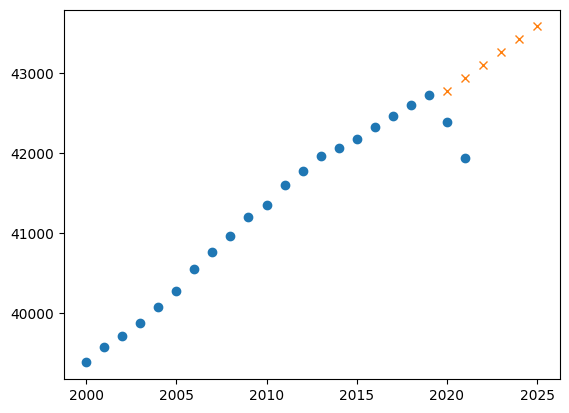

In [11]:
import matplotlib.pyplot as plt

plt.plot(data['Year'], data['Value'], 'o')
plt.plot([2020, 2021, 2022, 2023, 2024, 2025], predictions, 'x')


/Users/aaudric/miniconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


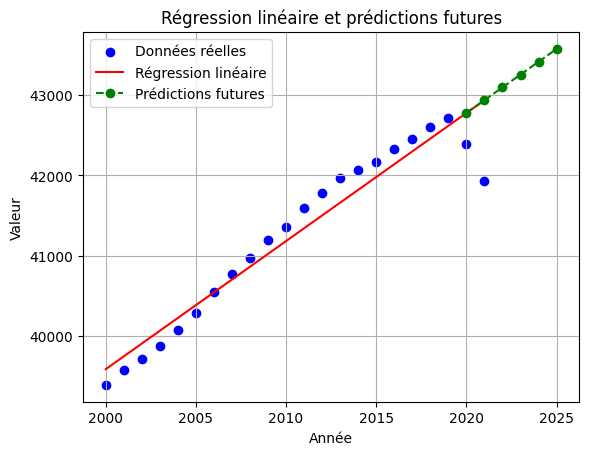

In [12]:
import matplotlib.pyplot as plt

# Plot des données réelles
plt.scatter(data['Year'], data['Value'], color='blue', label='Données réelles')

# Plot de la ligne de régression
plt.plot(data['Year'], linear_model.predict(data[['Year']]), color='red', label='Régression linéaire')

# Plot des prédictions futures
years_future = np.array([[2020], [2021], [2022], [2023], [2024], [2025]])
predictions = linear_model.predict(years_future)
plt.plot(years_future, predictions, color='green', linestyle='dashed', marker='o', label='Prédictions futures')

# Ajouter les étiquettes
plt.xlabel('Année')
plt.ylabel('Valeur')
plt.title('Régression linéaire et prédictions futures')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

In [13]:
import plotly.graph_objects as go
import numpy as np

# Préparation des prédictions
years_future = np.array([[2020], [2021], [2022], [2023], [2024], [2025]])
predictions = linear_model.predict(years_future)

# Création du graphique
fig = go.Figure()

# Ajout des données réelles
fig.add_trace(go.Scatter(x=data['Year'], y=data['Value'], mode='markers', name='Données réelles', marker=dict(color='blue')))

# Ajout de la ligne de régression
fig.add_trace(go.Scatter(x=data['Year'], y=linear_model.predict(data[['Year']]), mode='lines', name='Régression linéaire', line=dict(color='red')))

# Ajout des prédictions futures
fig.add_trace(go.Scatter(x=years_future.flatten(), y=predictions, mode='lines+markers', name='Prédictions futures', line=dict(dash='dash', color='green')))

# Mise en forme
fig.update_layout(
    title="Régression linéaire et prédictions futures",
    xaxis_title="Année",
    yaxis_title="Valeur",
    template="plotly_white"
)

# Afficher le graphique
fig.show()

/Users/aaudric/miniconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Clustering

In [38]:
data2 = get_who_data('WHOSIS_000001')
data2 = convert_to_dataframe(data2)
data2['Year'] = pd.to_numeric(data2['Year'], errors='coerce')
data2['Value']= data2['Value'].astype(str).str[:4]
data2['Value'] = data2['Value'].replace('No d', 0).astype(float)
data2

,Country,Continent,Year,Value
0,SLB,Western Pacific,2018,65.6
1,JPN,Western Pacific,2007,85.9
2,AGO,Africa,2017,62.0
3,SWE,Europe,2007,78.8
4,ZMB,Africa,2018,59.1
...,...,...,...,...
12931,UGA,Africa,2007,59.0
12932,DZA,Africa,2015,76.1
12933,CHN,Western Pacific,2013,79.1
12934,GUY,Americas,2002,67.8


/Users/aaudric/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aaudric/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aaudric/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aaudric/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will c

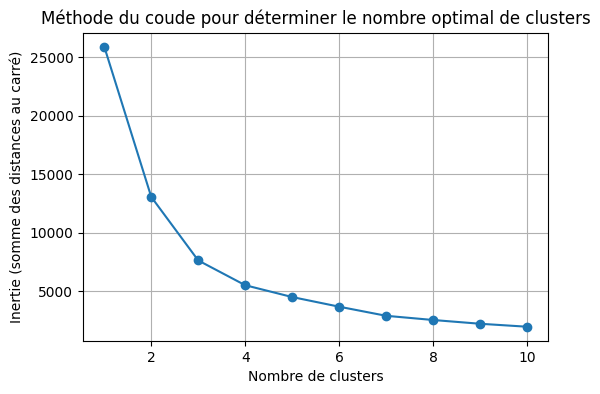

/Users/aaudric/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Country,Value,Cluster,Continent,Continent_encoded
0,SLB,65.6,2,Western Pacific,5
1,JPN,85.9,2,Western Pacific,5
2,AGO,62.0,1,Africa,0
3,SWE,78.8,0,Europe,3
4,ZMB,59.1,1,Africa,0
...,...,...,...,...,...
12931,UGA,59.0,1,Africa,0
12932,DZA,76.1,0,Africa,0
12933,CHN,79.1,2,Western Pacific,5
12934,GUY,67.8,1,Americas,1


In [20]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Exemple de data avec les continents


# Encodage des continents
label_encoder = LabelEncoder()
data2['Continent_encoded'] = label_encoder.fit_transform(data2['Continent'])

# Conservez les colonnes nécessaires pour le clustering
data2_for_clustering = data2[['Value', 'Continent_encoded']]

# Normalisez les données
scaler = StandardScaler()
data2_scaled = scaler.fit_transform(data2_for_clustering)

# Méthode du coude
inertia = []
cluster_range = range(1, 11)  # Par exemple, tester jusqu'à 10 clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data2_scaled)
    inertia.append(kmeans.inertia_)

# Tracé de la méthode du coude
plt.figure(figsize=(6, 4))
plt.plot(cluster_range, inertia, marker='o', linestyle='-')
plt.xlabel('Nombre de clusters')
plt.ylabel("Inertie (somme des distances au carré)")
plt.title("Méthode du coude pour déterminer le nombre optimal de clusters")
plt.grid(True)
plt.show()

# Application du clustering avec le nombre optimal de clusters (par exemple, 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data2_scaled)
data2['Cluster'] = kmeans.labels_

# Affichage du résultat final avec les pays, les valeurs et les clusters
data2 = data2[['Country', 'Value', 'Cluster', 'Continent', 'Continent_encoded']]
data2.reset_index(drop=True, inplace=True)

# Affichage des résultats
data2

In [40]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Exemple de data avec les continents
# data2 = pd.DataFrame({'Country': [...], 'Value': [...], 'Continent': [...]})
data2 = data2.groupby(['Country','Continent']).sum('Value')
data2 = data2.reset_index()
data2

,Country,Continent,Year,Value
0,AFG,Eastern Mediterranean,132693,3856.6
1,AGO,Africa,132693,3790.8
2,ALB,Europe,132693,5037.0
3,ARE,Eastern Mediterranean,132693,5288.2
4,ARG,Americas,132693,4990.7
...,...,...,...,...
180,WSM,Western Pacific,132693,4628.6
181,YEM,Eastern Mediterranean,132693,4396.3
182,ZAF,Africa,132693,3859.9
183,ZMB,Africa,132693,3659.0


/Users/aaudric/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aaudric/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aaudric/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aaudric/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will c

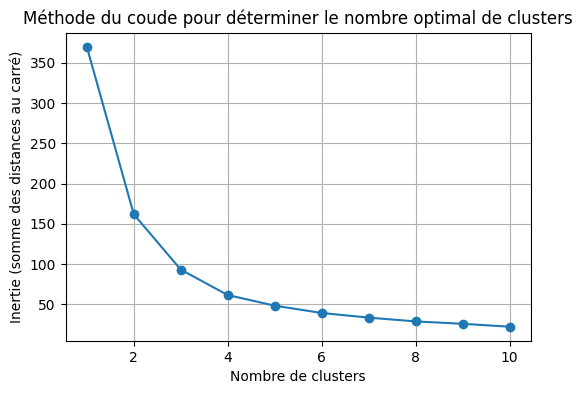

/Users/aaudric/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Country,Value,Cluster,Continent,Continent_encoded
0,AFG,3856.6,0,Eastern Mediterranean,2
1,AGO,3790.8,0,Africa,0
2,ALB,5037.0,1,Europe,3
3,ARE,5288.2,2,Eastern Mediterranean,2
4,ARG,4990.7,2,Americas,1
...,...,...,...,...,...
180,WSM,4628.6,1,Western Pacific,5
181,YEM,4396.3,2,Eastern Mediterranean,2
182,ZAF,3859.9,0,Africa,0
183,ZMB,3659.0,0,Africa,0


In [41]:

# Encodage des continents
label_encoder = LabelEncoder()
data2['Continent_encoded'] = label_encoder.fit_transform(data2['Continent'])

# Conservez les colonnes nécessaires pour le clustering
data2_for_clustering = data2[['Value', 'Continent_encoded']]

# Normalisation des données
scaler = StandardScaler()
data2_scaled = scaler.fit_transform(data2_for_clustering)

# Réduction de dimension avec PCA (1 composante principale)
pca = PCA(n_components=2)
data2_pca = pca.fit_transform(data2_scaled)

# Méthode du coude
inertia = []
cluster_range = range(1, 11)  # Tester jusqu'à 10 clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data2_pca)
    inertia.append(kmeans.inertia_)

# Tracé de la méthode du coude
plt.figure(figsize=(6, 4))
plt.plot(cluster_range, inertia, marker='o', linestyle='-')
plt.xlabel('Nombre de clusters')
plt.ylabel("Inertie (somme des distances au carré)")
plt.title("Méthode du coude pour déterminer le nombre optimal de clusters")
plt.grid(True)
plt.show()

# Application du clustering avec le nombre optimal de clusters (par exemple, 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data2_pca)
data2['Cluster'] = kmeans.labels_

# Affichage du résultat final avec les pays, les valeurs et les clusters
data2 = data2[['Country', 'Value', 'Cluster', 'Continent', 'Continent_encoded']]
data2.reset_index(drop=True, inplace=True)

# Affichage des résultats
data2

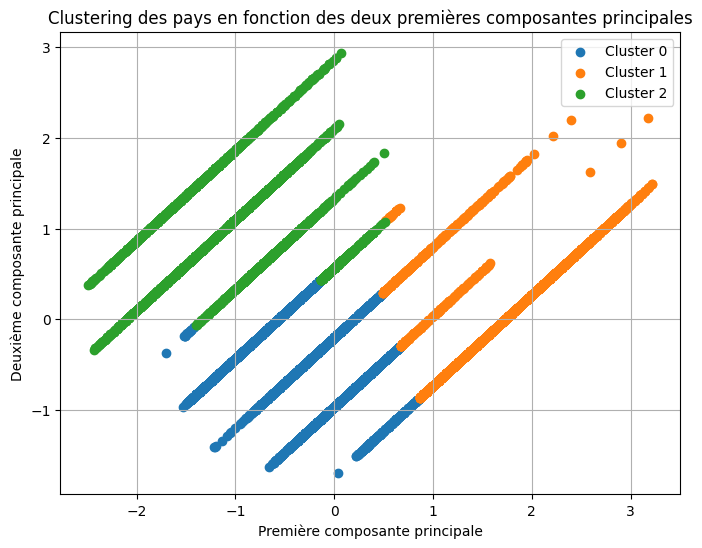

In [25]:
plt.figure(figsize=(8, 6))
for cluster in set(data2['Cluster']):
    subset = data2_pca[data2['Cluster'] == cluster]
    plt.scatter(subset[:, 0], subset[:, 1], label=f'Cluster {cluster}')

plt.xlabel("Première composante principale")
plt.ylabel("Deuxième composante principale")
plt.title("Clustering des pays en fonction des deux premières composantes principales")
plt.legend()
plt.grid(True)
plt.show()